#Assignment 2
#Saumya Gupta 204073004
# video link: https://drive.google.com/file/d/1iuYiYLKRB7kvJxNyLAkpz76GTvBv-9iv/view?usp=sharing

**Import required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
#from sklearn.metrics import mean_squared_error


# **Q1A and Q1B**

given input to functions is N and S ,i.e., the smaple size and generator matrix size (S=MxD) respectively.

In [2]:
def input_data_matrix_X(N,S): #Input, N and S
    M,D = S.shape             #S of size MxD
    A = np.random.randn(N,M)   #Random 2d array of size NxM , with a standard normal distribution
    X= np.dot(A, S)           #matrix multiplication of Random matrix A with generator matrix S
    return X                  # function returns X matrix of size N x D

**Q2a and Q2b**

In [3]:
def target_vector_t(X,w,sigma): # given inputs, X,w,sigma
  N,D=X.shape                   #X of size NxD
  if D+1 != len(w) :             #To check dimension mismatch between X and w
     raise ValueError("Dimension mismatch between X and w")
  gaussian_noise = np.random.normal(0, sigma, N) # adding gaussian noise
  t = X @ w[:-1] + w[-1] + gaussian_noise            # bias element w[-1], othere elements w[:-1]
  return t                                         # X of size NxD and w[1:] of size Dx1 ,t is of size Nx1


1.   https://www.digitalocean.com/community/tutorials/python-valueerror-exception-handling-examples
2. https://medium.com/@ms_somanna/guide-to-adding-noise-to-your-data-using-python-and-numpy-c8be815df524

# **Q3)** Compute pseudo inverse and measure time taken

Number of rows N varies while keeping the number of columns D fixed at 10 in the data matrix X

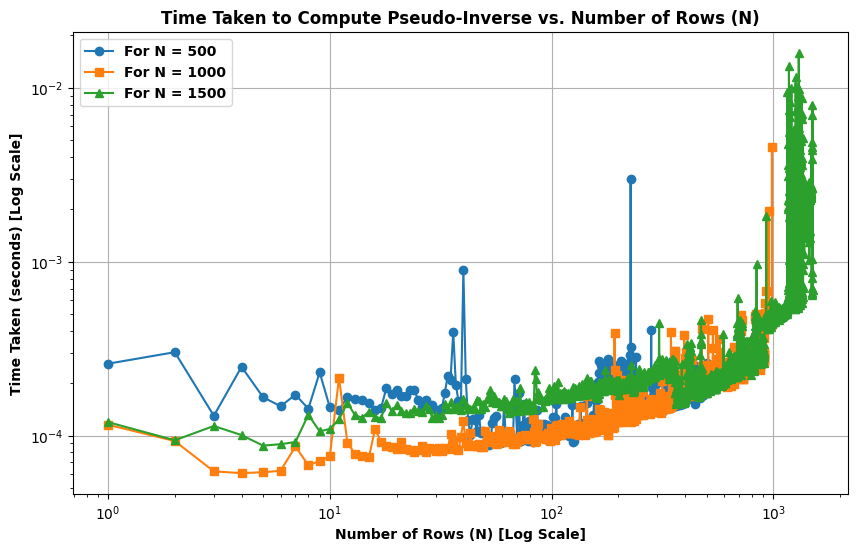

In [5]:

def measure_pseudo_inverse_time(max_N, S):   # Creating a pseudo inverse function that provides time and corresponding pseudo inverse, inputs are maximum no. of rows(N) and D =10

    N_values = []
    time_taken = []

    M, D = S.shape  # Get the shape of the generator matrix S ,to be used in X (data matrix)

    for N in range(1, max_N + 1):                                   # N value varied from 1 to max_N + 1
        X = input_data_matrix_X(N, S)                                # X calculated using the function input_data_matrix
        start_time = time.time()                                     # Measure the time taken to compute the pseudo-inverse
        np.linalg.pinv(X)                                            # Compute the pseudo-inverse of data matrix (X)
        end_time = time.time()
        N_values.append(N)  # Store the results
        time_taken.append(end_time - start_time)
    return N_values, time_taken

# Parameters
max_N1 = 500   # Maximum number of rows (N)
max_N2 = 1000
max_N3 = 1500
M = 15       # Setting M for generator matrix S
D = 10       # Fixed D (given)
S = np.random.randn(M, D)                                          # Generate the generator matrix S of size M x D
# Measure the time taken for different N
N1_values, time_taken1 = measure_pseudo_inverse_time(max_N1, S)
N2_values, time_taken2 = measure_pseudo_inverse_time(max_N2, S)
N3_values, time_taken3 = measure_pseudo_inverse_time(max_N3, S)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(N1_values, time_taken1, marker='o', label='For N = 500 ')
plt.plot(N2_values, time_taken2, marker='s', label='For N = 1000')
plt.plot(N3_values, time_taken3, marker='^', label='For N = 1500')
plt.xscale('log')  # Logarithmic scale for the x-axis and y-axis
plt.yscale('log')
plt.xlabel('Number of Rows (N) [Log Scale]',fontweight='bold')
plt.ylabel('Time Taken (seconds) [Log Scale]',fontweight='bold')
plt.title('Time Taken to Compute Pseudo-Inverse vs. Number of Rows (N)',fontweight='bold')
plt.grid(True)
plt.legend(prop={'weight': 'bold'})
plt.show()



1. chatgpt prompt:pseudo-inverse in numpy.linalg package with respect to size of data matrix with time measure
2. https://in.mathworks.com/matlabcentral/answers/213746-complexity-of-svd-and-pinv?s_tid=srchtitle





**Observation:**


1.   As value of N increases the time taken for computation is increasing exponentially.We also observe a break in graph for N =1500, where there is a sudden drop in time taken for computation, which reflect computational inaccuracy, or discrepance for higher values.

**Reason**
2.   The computation of the pseudo-inverse involves performing a Singular Value Decomposition (SVD) internally. The time complexity of SVD for an NxD matrix iso(ND^2) if N ≥ D. In our case N >> D ,computational cost increases quickly, with a non-linear growth in time. The computation time can become very long as N increases due to the cubic dependence on the larger dimension of the matrix.




# **Q4)** Normalised root mean squared error between a target vector(t) and predicted vector (y)

*   step 1: Define the predicted value y function
*   step 2: Plot the predicted and target values for dummy values
*   step 3: Calculate Mean square error
*   Step 4: Calculate Root Mean square error
*   Step 5: Calculate Normalized Root Mean square error


**NRMSE** is used to calculate the **accuracy of a regression model**, it quantifies how well a model is performing in predicting numerical outcomes.RMSE is preferred over other metrics like Mean Absolute Error (MAE) because it penalizes larger errors more significantly. This makes it sensitive to outliers, which can be beneficial when large errors are particularly undesirable.

We already have the Data matrix X, and the target vector t. Now, we define a function for predicted matrix y (similar to t but without the gaussian noise)

In [6]:
def predict_y(X, w):
    N, D = X.shape                  # X of size NxD
    if D + 1 != len(w):             # Check for dimension mismatch between X and w
        raise ValueError("Dimension mismatch between X and w")
    y = X @ w[1:] + w[0]            # Predicted values without Gaussian noise
    return y

**Example parameters to plot the target and predicted values**

Target vector t (with noise): [ 12.05922294  -6.84146062  11.93907038  -8.95290867  24.63877469
 -12.43120254 -20.57446457   4.63492934 -11.77608326 -21.66840008
 -11.02669563  -2.57736832 -14.95978125   9.5016681    4.2664541
  -0.43760176  -1.39998761  -5.10661622 -11.58868901 -13.23519058
   5.59937629 -13.79768747  -2.16830278 -14.58822515  -4.23959334
   1.75268203 -10.37978247 -12.67716883  -2.48603839  23.76718139
 -12.45875584  -0.0835435   -1.31756723  11.31470461   1.55092084
 -13.17276687  -2.23713821  -5.49616145  -4.66822099  -2.37230723
   8.17618704   0.59870075  25.74483279  29.06982566  -6.62476527
  -6.3190051    5.18615674  12.0576208    0.03099203   9.07101679]
Predicted vector y (without noise): [  2.2224106   -0.26825025  -4.30559849 -14.49278906  16.14011541
   2.19915659   4.18939663   7.18270507 -26.99950873  -1.39855819
   1.27634629  26.53622595  22.60561553  -9.93441865  -0.57583604
   2.74930984  -0.81477303   1.83714432 -13.14067883  -7.98329567
   0.26043

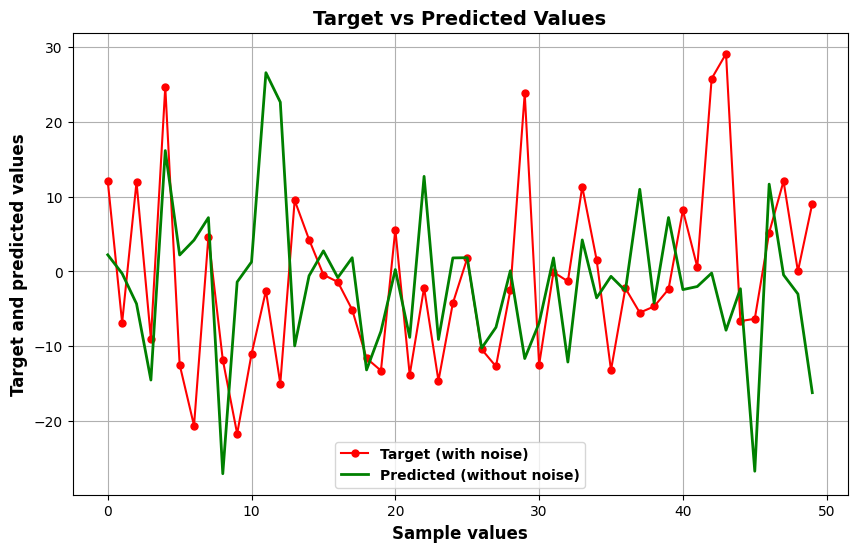

In [7]:
N = 50                      # Number of samples
M = 15                      # Number of rows in generator matrix S
D = 10                      # Number of columns in generator matrix S
S = np.random.randn(M, D)   # Generate a generator matrix S of size MxD
w = np.random.randn(D + 1)  # Generate weight vector w (D+1 for bias + weights)
sigma = 0.1                 # Noise standard deviation
X = input_data_matrix_X(N, S)  # Data matrix X using function input_data_matrix_X
t = target_vector_t(X, w, sigma) # Target vector t (with noise)
y = predict_y(X, w)              # Compute the predicted values y (without noise)
# Print the results
print("Target vector t (with noise):", t)
print("Predicted vector y (without noise):", y)
# Plot target vector t (with noise) and predicted vector y (without noise)
plt.figure(figsize=(10, 6))
plt.plot(t, 'ro-', label='Target (with noise)', markersize=5)       # Red dots for noisy target
plt.plot(y, 'g-', label='Predicted (without noise)', linewidth=2)  # green line for predicted
plt.xlabel('Sample values', fontsize=12, fontweight='bold')
plt.ylabel('Target and predicted values', fontsize=12, fontweight='bold')
plt.title('Target vs Predicted Values', fontsize=14, fontweight='bold')
plt.legend(prop={'weight': 'bold'})
plt.grid(True)
plt.show()


we can calculate the Root mean square error using a numpy function ,which can be further used to calculate the normalized root mean square error. Since, the normalized root mean square error is a normalized version of the RMSE that scales the error relative to the range of the target values.

Different ways to normalize the RMSE:
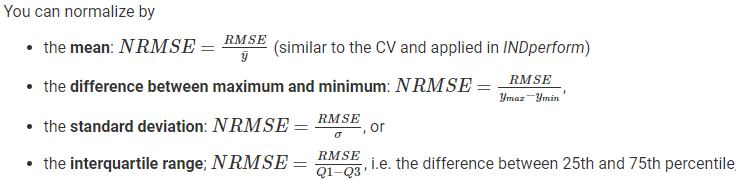



*in above ymax - ymin represent tmax - tmin



1.  https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/




In [8]:
MSE = np.mean((y - t) ** 2)    # Define MSE
RMSE = np.sqrt(MSE)                     # Define RMSE
NRMSE = RMSE / (np.max(t) - np.min(t))   #Normalize RMSE
print("Root Mean Square Error (RMSE):", RMSE)                    # Print RMSE
print("Normalized Root Mean Square Error (NRMSE):", NRMSE)       # Print NRMSE

Root Mean Square Error (RMSE): 14.622538864898242
Normalized Root Mean Square Error (NRMSE): 0.28819570750410695


**Observation:**
1. The predictions deviate from the actual target values by about 14.622 units as seen from RMSE value.
2. An NRMSE of 0.28 indicates that the RMSE constitutes approximately 28% of the range of the target values.


# Q5) Calculate the gradient of mean squared error wrt weights of linear regression

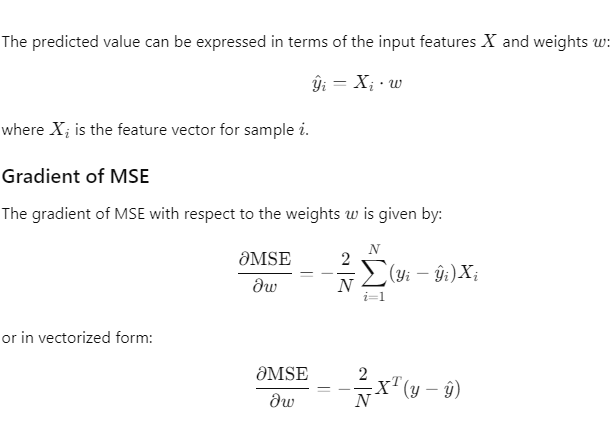

1.  https://www.bragitoff.com/2021/12/mean-squared-error-loss-function-and-its-gradient-derivative-for-a-batch-of-inputs-python-code/


These are same as before,
* N = 50                      # Number of samples
* M = 15                      # Number of rows in generator matrix S
* D = 10                      # Number of columns in generator matrix S
* S = np.random.randn(M, D)   # Generate a generator matrix S of size MxD
* w = np.random.randn(D + 1)  # Generate weight vector w (D+1 for bias + weights)
* sigma = 0.1                 # Noise standard deviation
* X = input_data_matrix_X(N, S)  # Data matrix X using function input_data_matrix_X
* t = target_vector_t(X, w, sigma) # Target vector t (with noise)
* y = predict_y(X, w)              # Compute the predicted values y (without noise)

In [9]:
def mse_gradient(X,w,sigma):
    N= X.shape[0]                    # No. of samples
    t = target_vector_t(X, w, sigma) # Target vector t (with noise)
    y = predict_y(X, w)              # Compute the predicted values y (without noise)
    errors = y - t                   # Errors (predicted - actual)
    gradient_w = (2 / N) * X.T.dot(errors)    # Gradient of MSE with respect to weights (excluding bias)
    gradient_b = (2 / N) * np.sum(errors)     # Gradient of MSE with respect to bias,Sum of errors divided by N
    return gradient_w, gradient_b  # Return both gradients


In [10]:
N = 50                      # Number of samples
M = 15                      # Number of rows in generator matrix S
D = 10                      # Number of columns in generator matrix S
sigma = 0.1                 # Noise standard deviation
S = np.random.randn(M, D)   # Generate a generator matrix S of size MxD
w = np.random.randn(D + 1)  # Generate weight vector w (D+1 for bias + weights)
X = input_data_matrix_X(N, S)  # Data matrix X using function input_data_matrix_X


In [11]:
gradient_w = mse_gradient(X, w, sigma)
gradient_b = mse_gradient(X, w, sigma)
print("Gradient of MSE with respect to weights:", gradient_w)
print("Gradient of MSE with respect to bias:", gradient_b)

Gradient of MSE with respect to weights: (array([-52.62084117,  30.1375564 , -98.92229361, 101.8030101 ,
       176.30726484, -61.98802457, 148.8293257 , -98.67790093,
        62.46064891, -62.59515616]), -0.5476971080797463)
Gradient of MSE with respect to bias: (array([-52.51224726,  30.21546355, -99.04954323, 102.09399615,
       176.45149305, -62.16497524, 148.93063875, -98.80530616,
        62.65293851, -62.70388802]), -0.5654312556490997)


* By including the gradient with respect to the bias, we can ensure that both the weights and bias are adjusted during the training process to minimize the MSE.
* We Update the weights and bias in the opposite direction of the gradients to minimize the MSE for optimization.
* Large gradient values indicate that our model is quite sensitive to certain weights, which could be beneficial for model improvement during training.

* **INPUTS:** data matrix (X), weights(w) and sigma (standard deviation for noise introduction)
* **OUTPUT:** gradient_w (representing MSE gradient wrt weights) and gradient_b (representing gradient of MSE wrt bias)

1. chatgpt prompt: formula of gradient of mse wrt both weights and bias

# Q6) Gradient of L2 norm of weights wrt weights

In [12]:
def L2_norm(w):
  return np.sqrt(np.sum(np.square(w)))

def grad_L2_norm(w):
  return w / L2_norm(w)

In [13]:
N = 50                      # Number of samples
M = 15                      # Number of rows in generator matrix S
D = 10                      # Number of columns in generator matrix S
S = np.random.randn(M, D)   # Generate a generator matrix S of size MxD
w = np.random.randn(D+1)    # Generate weight vector w (D+1 for bias + weights)
sigma = 0.1                 # Noise standard deviation
X = input_data_matrix_X(N, S)  # Data matrix X using function input_data_matrix_X

In [14]:
L2 = L2_norm(w)
grad_L2= grad_L2_norm(w)
print("L2 norm of weights:", L2)
print("Gradient of L2 norm of weights:", grad_L2)

L2 norm of weights: 2.369347428084547
Gradient of L2 norm of weights: [-0.30417775 -0.38102762  0.10876563 -0.28633455  0.10973091 -0.14540845
  0.45243207 -0.08360417  0.08598265 -0.63855201  0.09200983]


# Q6) Gradient of L1 norm of weights wrt weights

In [15]:
def L1_norm(w):
  return np.sum(np.abs(w))

def grad_L1_norm(w):
  return np.sign(w)

In [16]:
L1= L1_norm(w)
grad_L1= grad_L1_norm(w)
print("L1 norm of weights:", L1)
print("Gradient of L1 norm of weights:", grad_L1)

L1 norm of weights: 6.368866623289185
Gradient of L1 norm of weights: [-1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.]


1. https://neuraspike.com/blog/l2-regularization-with-python/

# Q8) Gradient Descent on MSE + 𝜆1 L1 + 𝜆2 L2


In [17]:
# Gradient descent with MSE + L1 + L2 regularization
def gradient_descent_with_regularization(X, t, w, sigma, lambda1, lambda2, alpha=0.01, tolerance=1e-6, max_iters=1000):
    N, D = X.shape     # Number of samples and number of features
    loss_history = []  # To store the loss at each iteration

    for i in range(max_iters):
        y = predict_y(X, w)            # Compute predicted values y based on current weights and bias
        errors = y - t                # Compute the errors (predicted - actual)
        # Compute gradient of MSE (mean squared error)
        gradient_w = (2 / N) * X.T.dot(errors)   # Gradient w.r.t. weights
        gradient_b = (2 / N) * np.sum(errors)    # Gradient w.r.t. bias
        mse_gradient = np.append(gradient_w, gradient_b)  # Combine gradient of weights and bias
        grad_L1 = grad_L1_norm(w)  # Gradient of L1 norm (Lasso)
        grad_L2 = grad_L2_norm(w)  # Gradient of L2 norm (Ridge)
        total_gradient = mse_gradient + lambda1 * grad_L1 + lambda2 * grad_L2   # Combine gradients (MSE + L1 + L2)
        w_new = w - alpha * total_gradient                     # Update weights (including the bias term as w[-1])
        mse_loss = np.mean(errors ** 2)                        # Calculate the current loss (MSE + regularization terms)
        l1_loss = lambda1 * L1_norm(w[:-1])
        l2_loss = lambda2 * L2_norm(w[:-1])
        total_loss = mse_loss + l1_loss + l2_loss
        loss_history.append(total_loss)
        # Print for 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Total Loss = {total_loss}, MSE Loss = {mse_loss}, L1 Loss = {l1_loss}, L2 Loss = {l2_loss}")
        # Stopping criterion (convergence check)
        if np.linalg.norm(w_new - w, ord=1) < tolerance:
            print(f'Converged after {i + 1} iterations.')
            break
        w = w_new                 # Update weights for the next iteration
    # Plot the loss history
    plt.plot(loss_history)
    plt.title("Loss over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Loss (MSE + L1 + L2)")
    plt.show()
    return w  # Return optimized weights (including bias)

# Prediction function (linear model using w[-1] as the bias)
def predict_y(X, w):
    return X @ w[:-1] + w[-1]


# L1 regularization gradient
def grad_L1_norm(w):
    return np.append(np.sign(w[:-1]), 0)  # Bias does not affect L1 regularization

# L2 regularization gradient
def grad_L2_norm(w):
    return np.append(w[:-1], 0)  # Exclude bias from L2 regularization


Iteration 0: Total Loss = 1.1680668102648935, MSE Loss = 0.011938126149109657, L1 Loss = 0.8244222234874145, L2 Loss = 0.3317064606283694
Iteration 100: Total Loss = 1.1373340745950384, MSE Loss = 0.033379478366826566, L1 Loss = 0.7848753121601664, L2 Loss = 0.31907928406804553
Iteration 200: Total Loss = 1.1296309937109887, MSE Loss = 0.043793014649144035, L1 Loss = 0.7701595245808004, L2 Loss = 0.31567845448104415
Iteration 300: Total Loss = 1.1280184380163498, MSE Loss = 0.052957665487720684, L1 Loss = 0.7612303174306011, L2 Loss = 0.313830455098028
Iteration 400: Total Loss = 1.128180555240057, MSE Loss = 0.059592290606203926, L1 Loss = 0.7558011911905651, L2 Loss = 0.312787073443288
Iteration 500: Total Loss = 1.1287019442763668, MSE Loss = 0.06401922734557512, L1 Loss = 0.7525000707188663, L2 Loss = 0.31218264621192543
Iteration 600: Total Loss = 1.1291753714709893, MSE Loss = 0.06685624348220737, L1 Loss = 0.7504928419226344, L2 Loss = 0.31182628606614754
Iteration 700: Total Lo

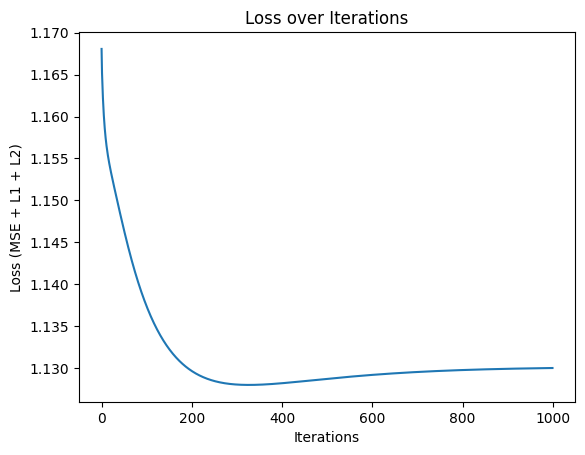

In [18]:
# Number of samples and dimensions
N = 50                      # Number of samples
M = 15                      # Number of rows in generator matrix S
D = 10                      # Number of columns in generator matrix S
S = np.random.randn(M, D)   # Generate a generator matrix S of size MxD
w = np.random.randn(D + 1)  # Generate weight vector w (D+1 for bias + weights)
sigma = 0.1                 # Noise standard deviation

# Generate data matrix X and target vector t
X = input_data_matrix_X(N, S)     # Data matrix X
t = target_vector_t(X, w, sigma)  # Target vector t (with noise)

# Define regularization parameters
lambda1 = 0.1  # L1 regularization strength
lambda2 = 0.1  # L2 regularization strength

# Perform gradient descent with regularization
w_optimal = gradient_descent_with_regularization(X, t, w, sigma, lambda1, lambda2)

# Predicted values with the optimized weights
y_pred = predict_y(X, w_optimal)


1. Chatgpt prompt: Grad MSE+ lambda1 L1 +lambda2 L2 , function with plot

observation:
1. As the iteration increase, we see the effect of elastic net, the loss is decreasing.

# Q9) Impact of sigma on the NRMSE for linear regression using gradient descent.

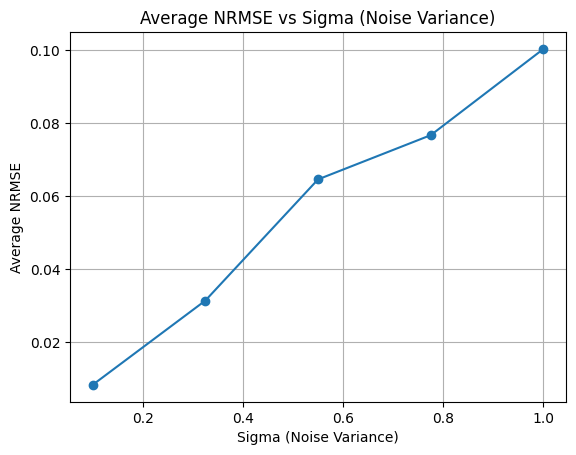

In [20]:
# Re-defining input matrix X, as S matrix will now be G matrix
def input_data_matrix_X(N, D):
    G = np.eye(D)             # Generator matrix is identity matrix
    A = np.random.randn(N, D)
    X = np.dot(A, G)          # X is matrix multiplication of A and G (identity)
    return X

# Gradient descent with L2 regularization (without L1)
def gradient_descent(X, t, w, alpha=0.01, tolerance=1e-6, max_iters=1000):
    N, D = X.shape
    for i in range(max_iters):
        y = predict_y(X, w)
        errors = y - t
        gradient_w = (2 / N) * X.T.dot(errors)
        gradient_b = (2 / N) * np.sum(errors)
        total_gradient = np.append(gradient_w, gradient_b)

        w_new = w - alpha * total_gradient

        if np.linalg.norm(w_new - w, ord=1) < tolerance:
            break
        w = w_new     # new weight update

    return w

# NRMSE calculation(same as before now as a function)
def calculate_nrmse(y, t):
    mse = np.mean((y - t) ** 2)
    rmse = np.sqrt(mse)
    nrmse = rmse / (np.max(t) - np.min(t))
    return nrmse

# Experiment to calculate average NRMSE for different sigma values
def experiment(N, D, sigma_values, train_ratio=0.8, num_runs=5):
    avg_nrmse_per_sigma = []

    for sigma in sigma_values:
        nrmse_list = []

        for _ in range(num_runs):
            # Generate random data
            X = input_data_matrix_X(N, D)
            w_true = np.random.randn(D + 1)  # Random true weights including bias
            t = target_vector_t(X, w_true, sigma)  # Generate target vector with noise

            # Split into training and validation sets
            split_idx = int(train_ratio * N)
            X_train, X_val = X[:split_idx], X[split_idx:]
            t_train, t_val = t[:split_idx], t[split_idx:]

            # Initialize random weights for gradient descent
            w_init = np.random.randn(D + 1)

            # Train using gradient descent
            w_opt = gradient_descent(X_train, t_train, w_init)

            # Predict on validation set
            y_val = predict_y(X_val, w_opt)

            # Calculate NRMSE on validation set
            nrmse_val = calculate_nrmse(y_val, t_val)
            nrmse_list.append(nrmse_val)

        # Average NRMSE for this sigma over all runs
        avg_nrmse = np.mean(nrmse_list)
        avg_nrmse_per_sigma.append(avg_nrmse)

    return avg_nrmse_per_sigma

# Set parameters for the experiment
N = 100                      # Number of samples
D = 10                       # Number of features
sigma_values = np.linspace(0.1, 1.0, 5)  # Different noise levels (sigma) , giving 5 different sigma values
avg_nrmse = experiment(N, D, sigma_values)
# Plot NRMSE vs Sigma
plt.plot(sigma_values, avg_nrmse, marker='o')
plt.title('Average NRMSE vs Sigma (Noise Variance)')
plt.xlabel('Sigma (Noise Variance)')
plt.ylabel('Average NRMSE')
plt.grid(True)
plt.show()


1. chargpt prompt: plot average NRMSE on validation subset for five runs versus sigma with code

observation:
1. As sigma increases the NRMSE also increases, this occurs because larger noise levels add variability making it harder to predict target values accurately.

# Q10) Impact of N and 𝜆2 on NRMSE

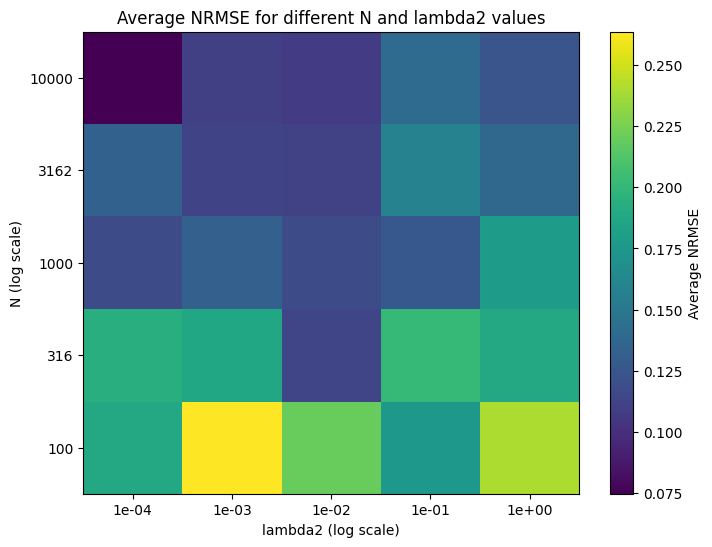

In [22]:
def gradient_descent(X, t, w, lambda2, alpha=0.001, tolerance=1e-6, max_iters=1000):
    N, D = X.shape
    for i in range(max_iters):
        y = predict_y(X, w)
        errors = y - t
        gradient_w = (2 / N) * X.T.dot(errors) + 2 * lambda2 * w[:-1]
        gradient_b = (2 / N) * np.sum(errors)
        total_gradient = np.append(gradient_w, gradient_b)

        # Clipping the gradient to avoid overflow as using the previous gradient function with higher lambda value was having overflow and warnings.
        total_gradient = np.clip(total_gradient, -1, 1)

        w_new = w - alpha * total_gradient

        # Check for NaN or Inf values
        if np.any(np.isnan(w_new)) or np.any(np.isinf(w_new)):
            print("Warning: weights contain NaN or Inf")
            break

        if np.linalg.norm(w_new - w, ord=1) < tolerance:
            break
        w = w_new

    return w

# Initialize random weights for gradient descent with smaller scale
w_init = np.random.randn(D + 1) * 0.01

# Experiment to calculate average NRMSE for different N and lambda2 values
def experiment(N_values, lambda2_values, D, sigma, train_ratio=0.8, num_runs=5):
    avg_nrmse_matrix = np.zeros((len(N_values), len(lambda2_values)))

    for i, N in enumerate(N_values):
        for j, lambda2 in enumerate(lambda2_values):
            nrmse_list = []

            for _ in range(num_runs):
                # Generate random data
                X = input_data_matrix_X(N, D)
                w_true = np.random.randn(D + 1)  # Random true weights including bias
                t = target_vector_t(X, w_true, sigma)  # Generate target vector with noise

                # Split into training and validation sets
                split_idx = int(train_ratio * N)
                X_train, X_val = X[:split_idx], X[split_idx:]
                t_train, t_val = t[:split_idx], t[split_idx:]

                # Initialize random weights for gradient descent
                w_init = np.random.randn(D + 1)

                # Train using gradient descent with L2 regularization
                w_opt = gradient_descent(X_train, t_train, w_init, lambda2)

                # Predict on validation set
                y_val = predict_y(X_val, w_opt)

                # Calculate NRMSE on validation set
                nrmse_val = calculate_nrmse(y_val, t_val)
                nrmse_list.append(nrmse_val)

            # Average NRMSE for this (N, lambda2) pair over all runs
            avg_nrmse_matrix[i, j] = np.mean(nrmse_list)

    return avg_nrmse_matrix

# Set parameters for the experiment
N_values = np.logspace(2, 4, 5, dtype=int)  # 5 values for N in log scale (e.g., 100, 200, ..., 10000)
lambda2_values = np.logspace(-4, 0, 5)      # 5 values for lambda2 in log scale (e.g., 1e-4, 1e-3, ..., 1)
D = 10                                      # Number of features
sigma = 0.1                                 # Fixed noise standard deviation

# Run the experiment
avg_nrmse_matrix = experiment(N_values, lambda2_values, D, sigma)

# Plot the results (heatmap of NRMSE)
plt.figure(figsize=(8, 6))
plt.imshow(avg_nrmse_matrix, cmap='viridis', aspect='auto', interpolation='nearest', origin='lower')
plt.colorbar(label='Average NRMSE')
plt.xticks(np.arange(len(lambda2_values)), labels=[f'{l:.0e}' for l in lambda2_values])
plt.yticks(np.arange(len(N_values)), labels=N_values)
plt.title('Average NRMSE for different N and lambda2 values')
plt.xlabel('lambda2 (log scale)')
plt.ylabel('N (log scale)')
plt.show()


observation:
1. As N increases, we expect the model to perform better, resulting in a lower NRMSE.(darkest blue on top right)
2. Increasing 𝜆2 can help prevent overfitting, especially for small N, but too large 𝜆2 may cause underfitting, leading to higher NRMSE.(yellow and green boxes on bottom right side).

1. chatgpt prompt: do same for N and lambda 2 variation

# Q11) impact of 𝜆1 on variable elimination

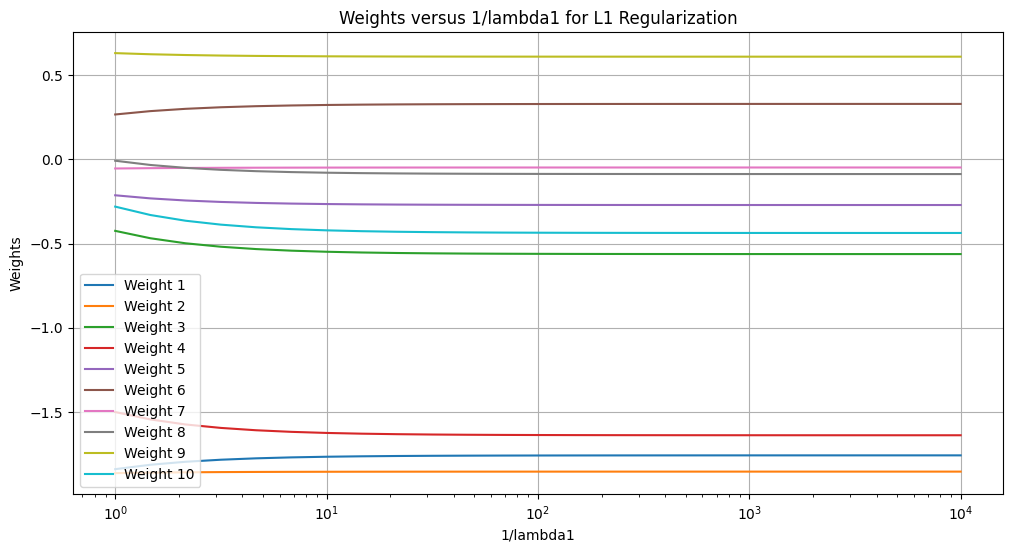

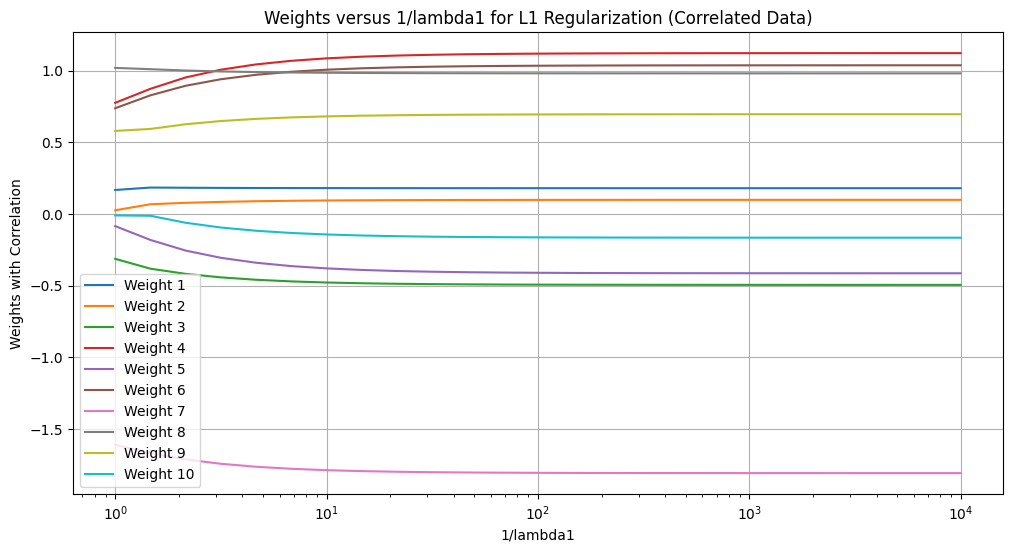

In [23]:
# redefining X to original notations
def input_data_matrix_X(N, S):
    M, D = S.shape
    A = np.random.randn(N, M)
    X = np.dot(A, S)
    return X

# Gradient descent with L1 regularization
def gradient_descent_l1(X, t, w, lambda1, alpha=0.01, tolerance=1e-6, max_iters=1000):
    N, D = X.shape
    for i in range(max_iters):
        y = predict_y(X, w)
        errors = y - t
        gradient_w = (2 / N) * X.T.dot(errors) + lambda1 * np.sign(w[:-1])
        gradient_b = (2 / N) * np.sum(errors)
        total_gradient = np.append(gradient_w, gradient_b)

        w_new = w - alpha * total_gradient

        if np.linalg.norm(w_new - w, ord=1) < tolerance:
            break
        w = w_new

    return w

# Main experiment function
def experiment_lambda1_effect():
    N = 100  # Number of samples
    M = 15   # Number of features
    D = 10   # Number of columns in generator matrix S
    S = np.random.randn(M, D)  # Generator matrix
    w_true = np.random.randn(D + 1)  # True weights (including bias)
    sigma = 0.1  # Noise standard deviation

    X = input_data_matrix_X(N, S)  # Data matrix X
    t = target_vector_t(X, w_true, sigma)  # Target vector t

    lambda1_values = np.logspace(-4, 0, 25)  # Range of lambda1 values
    weights = []

    for lambda1 in lambda1_values:
        w_init = np.random.randn(D + 1) * 0.01
        w_learned = gradient_descent_l1(X, t, w_init, lambda1)
        weights.append(w_learned[:-1])  # Exclude bias weight

    # Plot weights versus 1/lambda1
    plt.figure(figsize=(12, 6))
    for i in range(weights[0].shape[0]):
        plt.plot(1/lambda1_values, [w[i] for w in weights], label=f'Weight {i+1}')
    plt.xscale('log')
    plt.xlabel('1/lambda1')
    plt.ylabel('Weights')
    plt.title('Weights versus 1/lambda1 for L1 Regularization')
    plt.legend()
    plt.grid()
    plt.show()

# Run the first experiment
experiment_lambda1_effect()

# introduce correlation in the data
def introduce_correlation(X, correlation_factor=0.5):
    N, D = X.shape
    for i in range(1, D):
        X[:, i] += correlation_factor * X[:, i-1]
    return X

# Run the experiment again with correlated data
def experiment_lambda1_effect_with_correlation():
    N = 100
    M = 15
    D = 10
    S = np.random.randn(M, D)
    w_true = np.random.randn(D + 1)
    sigma = 0.1

    X = input_data_matrix_X(N, S)
    X = introduce_correlation(X)  # Introduce correlation
    t = target_vector_t(X, w_true, sigma)

    lambda1_values = np.logspace(-4, 0, 25)
    weights = []

    for lambda1 in lambda1_values:
        w_init = np.random.randn(D + 1) * 0.01
        w_learned = gradient_descent_l1(X, t, w_init, lambda1)
        weights.append(w_learned[:-1])

    # Plot weights versus 1/lambda1
    plt.figure(figsize=(12, 6))
    for i in range(weights[0].shape[0]):
        plt.plot(1/lambda1_values, [w[i] for w in weights], label=f'Weight {i+1}')
    plt.xscale('log')
    plt.xlabel('1/lambda1')
    plt.ylabel('Weights with Correlation')
    plt.title('Weights versus 1/lambda1 for L1 Regularization (Correlated Data)')
    plt.legend()
    plt.grid()
    plt.show()

# Run the second experiment
experiment_lambda1_effect_with_correlation()


observation:

1. plot1: As 𝜆1 increases, the L1 regularization encourages more weights to become exactly zero. This leads to variable elimination,the model disregards less important features performing feature selection.
2. When correlation is introduced into the columns of X, it can affect the learned weights.On correlated features we observe different weight elimination pattern as some weights may not approach zero as quickly, indicating that the presence of correlated features keep them relevant.

# Q12) Grouping effect of elastic net on correlated columns of X

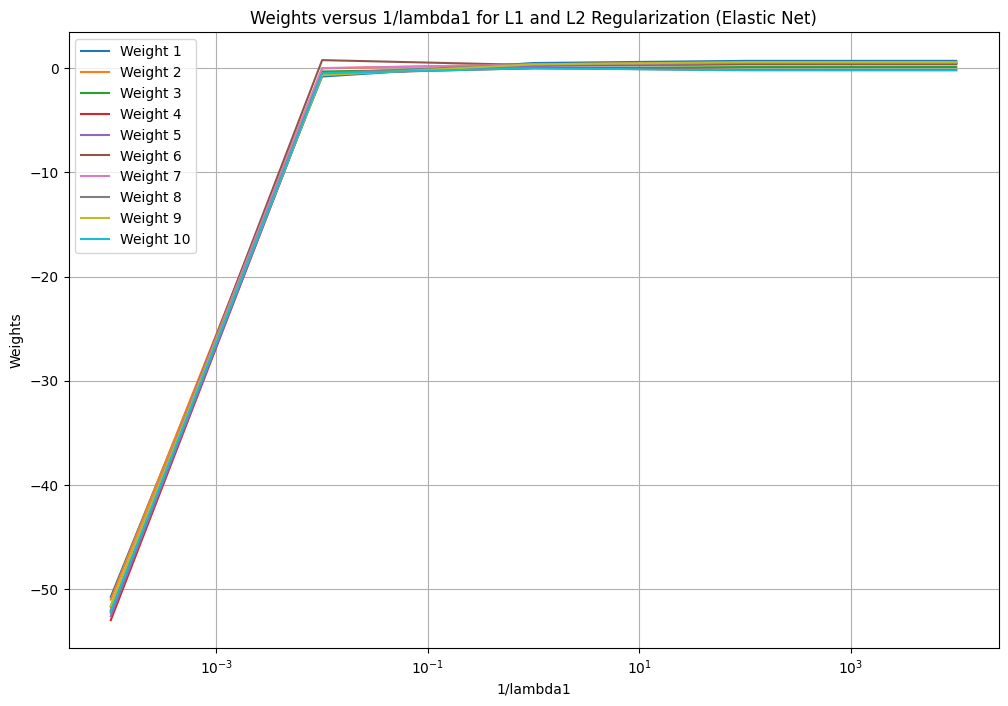

In [27]:
# Generate a synthetic dataset, it is different from previous X as the dimension is NxM here and not NxD
def generate_random_data(N, M):
    np.random.seed(42)
    return np.random.randn(N, M)

#Introduce correlation in the data
def introduce_correlation(X, correlation_factor=0.5):
    N, D = X.shape
    for i in range(1, D):
        X[:, i] += correlation_factor * X[:, i - 1]
    return X

#Define the Elastic Net loss function
def elastic_net_loss(X, y, w, lambda1, lambda2):
    mse = np.mean((X @ w - y) ** 2)                     #loss function
    l1_penalty = lambda1 * np.sum(np.abs(w))            #lasso
    l2_penalty = lambda2 * np.sum(w ** 2)               #ridge
    return mse + l1_penalty + l2_penalty                  #elastic net

#Implement gradient descent for Elastic Net
def gradient_descent_elastic_net(X, y, lambda1, lambda2, alpha=0.01, num_iterations=1000):
    N, D = X.shape
    w = np.zeros(D)  # Initialize weights
    for _ in range(num_iterations):
        predictions = X @ w
        error = predictions - y
        mse_gradient = (2/N) * (X.T @ error)
        l1_gradient = lambda1 * np.sign(w)
        l2_gradient = 2 * lambda2 * w
        total_gradient = mse_gradient + l1_gradient + l2_gradient
        w -= alpha * total_gradient  # Update weights
    return w

#Experiment with varying lambda1 and plot results
def plot_weights_vs_lambda1(N, M, lambda1_values, lambda2):
    X = generate_random_data(N, M)
    X = introduce_correlation(X)  # Introduce correlation
    true_weights = np.random.randn(M)
    y = X @ true_weights + np.random.normal(0, 0.1, N)  # same as the predict y function, but without bias

    weights_list = []

    for lambda1 in lambda1_values:
        weights = gradient_descent_elastic_net(X, y, lambda1, lambda2)
        weights_list.append(weights)

    # Convert weights_list to an array for easy plotting
    weights_array = np.array(weights_list)

    # Plotting
    plt.figure(figsize=(12, 8))
    for i in range(M):
        plt.plot(1/np.array(lambda1_values), weights_array[:, i], label=f'Weight {i+1}')

    plt.xscale('log')
    plt.title('Weights versus 1/lambda1 for L1 and L2 Regularization (Elastic Net)')
    plt.xlabel('1/lambda1')
    plt.ylabel('Weights')
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
N = 100  # Number of samples
M = 10   # Number of features
lambda1_values = np.logspace(-4, 4, 5)  # 5 values of lambda1 on a log scale
lambda2 = 1.0  # Fixed lambda2 value

# Run the experiment
plot_weights_vs_lambda1(N, M, lambda1_values, lambda2)


1. Chatgpt prompt: Effect of elastic net on correlated column of X ,same as above

# Q13) Linear binary classification vector

In [28]:
def linear_binary_classification_vector(X,w,sigma=0.1):
  y=X@w
  gaussian_noise = np.random.normal(0, sigma, N) # adding gaussian noise
  y_noisy= y + gaussian_noise
  # Applying threshold to get binary classification (0 or 1)
  b_target = (y_noisy >= 0).astype(int)                     #values greater than or equal to 0 are classified as 1 (positive class), and values less than 0 are classified as 0 (negative class).

  return b_target


In [29]:
# Example
N = 100  # number of samples
D = 5    # number of features
X = np.random.randn(N, D)
# weight vector w
w = np.random.randn(D)
# Generate binary classification target vector b_target
b_target = linear_binary_classification_vector(X, w, sigma)

print("Binary target vector:", b_target)


Binary target vector: [ 15.92069081   8.97739264   7.96811705 -11.64961892   4.98720884
  10.81019162  -5.74073956  -4.18432397   7.36612078  11.62882471
  -4.40248464   2.11853723  16.6606736    4.41160878   6.8800602
  11.4441011    3.82047477   1.80333296   6.0393069   -4.56454487
  -4.44873104  13.07689479  -9.89593912  -7.42065336   7.98582019
  -3.78369311   3.19691919  10.67849106  -1.42839686  -6.45065436
  23.54373132   1.51601901   9.20950238  -0.33068394 -16.08951703
   6.69534238  -5.9349278   11.59699742  -4.91956746  -6.86423317
   6.88720937   9.60148317  -6.77151988  -1.17535262  -6.77310393
  15.32195192  -3.94814163 -12.26198788   7.4959037    5.4060971 ]


# Q14) Binary cross entropy

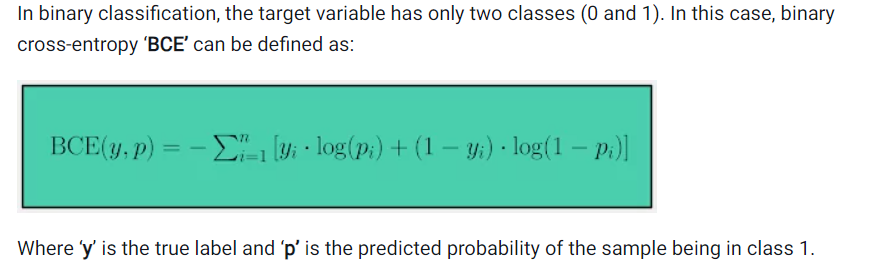

1. https://www.aporia.com/learn/understanding-binary-cross-entropy-and-log-loss-for-effective-model-monitoring/

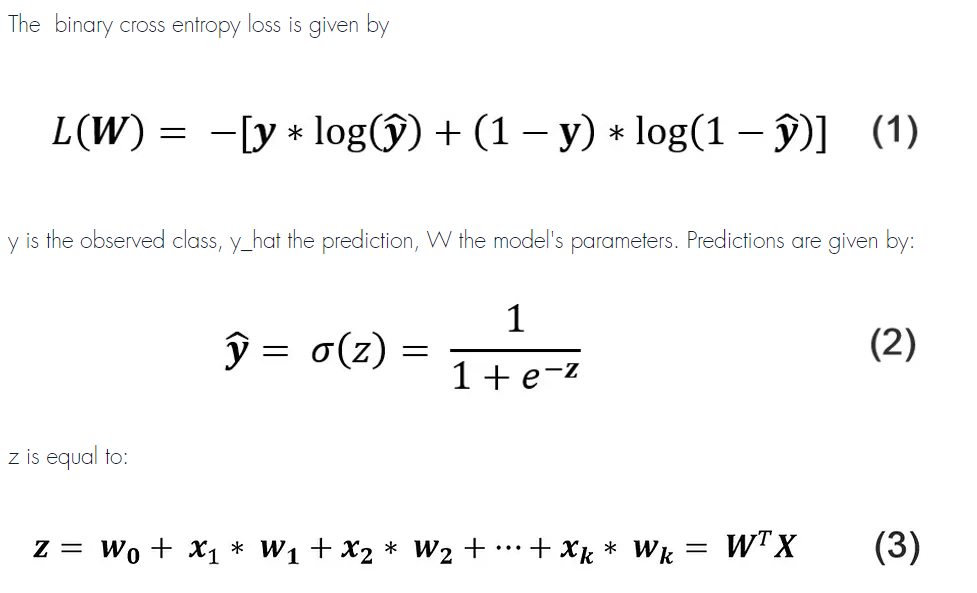

**Gradient with y_hat and weight**

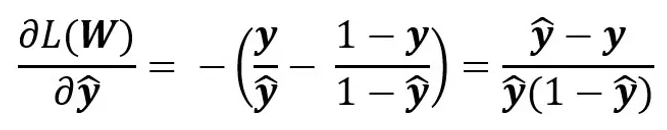

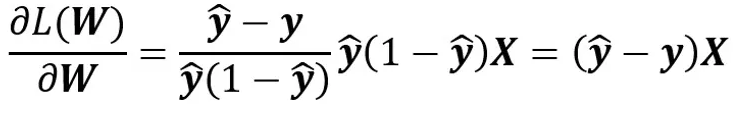

1. https://www.python-unleashed.com/post/derivation-of-the-binary-cross-entropy-loss-gradient

In [35]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss function
def binary_cross_entropy_loss(y_true, y_pred):
    # Clipping y_pred to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


# Gradient of binary cross-entropy loss w.r.t. weights
def gradient_bce(X, y_true, y_pred):
    gradient_w = np.dot(X.T, (y_pred - y_true)) / X.shape[0]
    return gradient_w

# Q15) obtaining gradient descent, then examine effect of N and 𝜆2 on NRMSE

In [48]:
def gradient_descent_bce(X, y_true, w_bce, alpha=0.01, epochs=1000):
    losses = []
    for epoch in range(epochs):
        # Compute predictions using the current weights
        z = np.dot(X, w_bce)
        y_pred = sigmoid(z)

        # Compute binary cross-entropy loss
        loss = binary_cross_entropy_loss(y_true, y_pred)
        losses.append(loss)

        # Compute the gradient of the loss function
        gradient_w = gradient_bce(X, y_true, y_pred)

        # Update the weights using gradient descent
        w_bce -= alpha * gradient_w

        # Print loss every 100 iterations
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return w_bce, losses
# Number of samples N and number of features D
N = 100
D = 10

# A random data matrix X and binary target vector b_target and weight
# Train the model using gradient descent
alpha = 0.01
epochs = 1000
w_opt, losses = gradient_descent_bce(X, b_target, w, alpha, epochs)

# Print the optimized weights
print("Optimized weights:", w_opt)


Epoch 0, Loss: 0.10851965166957495
Epoch 100, Loss: 0.10734977863359868
Epoch 200, Loss: 0.10622323473397194
Epoch 300, Loss: 0.10513696909491274
Epoch 400, Loss: 0.10408825265199516
Epoch 500, Loss: 0.10307463468017362
Epoch 600, Loss: 0.10209390618733033
Epoch 700, Loss: 0.1011440689666012
Epoch 800, Loss: 0.1002233093301927
Epoch 900, Loss: 0.09932997573055552
Optimized weights: [ 0.34492158 -0.00499294  0.44234508  0.34233797  0.29665335 -0.78702761
 -3.51159851  0.06958154  1.6335153   1.60864688]


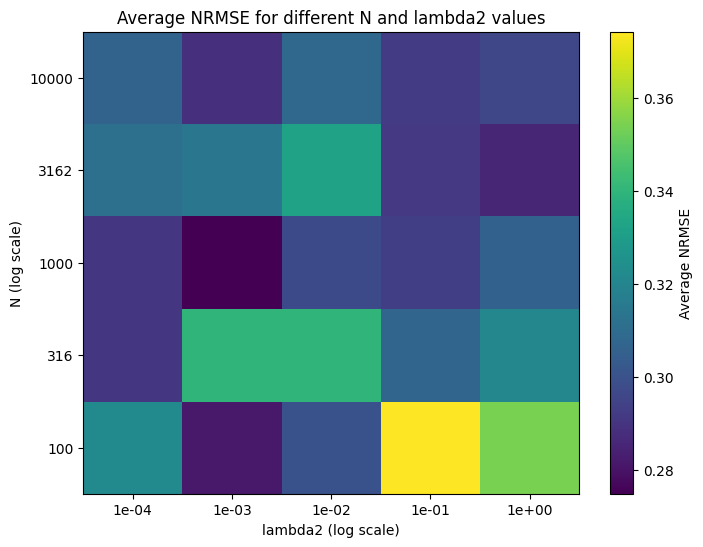

In [62]:
#functions taken from earlier parts and utilized here are: sigmoid, binary_cross_entropy_loss, gradient_bce, gradient_descent_bce, input_data_matrix_X,
def target_vector_t(X, w, sigma):
    N = X.shape[0]
    z = np.dot(X, w) + np.random.normal(0, sigma, N)  # Linear function with noise
    t = (sigmoid(z) > 0.5).astype(int)  # Binary classification
    return t

# Predict using trained weights
def predict_y(X, w_opt):
    z = np.dot(X, w_opt)
    y_pred = sigmoid(z)
    return y_pred

# Calculate NRMSE (normalized root mean square error)
def calculate_nrmse(y_pred, y_true):
    mse = np.mean((y_pred - y_true)**2)
    rmse = np.sqrt(mse)
    nrmse = rmse / (np.max(y_true) - np.min(y_true))  # Normalize by range
    return nrmse

# Initialize random weights for gradient descent with smaller scale
w_init = np.random.randn(D + 1) * 0.01

# Experiment to calculate average NRMSE for different N and lambda2 values
def experiment(N_values, lambda2_values, D, sigma, train_ratio=0.8, num_runs=5):
    avg_nrmse_matrix = np.zeros((len(N_values), len(lambda2_values)))

    for i, N in enumerate(N_values):
        for j, lambda2 in enumerate(lambda2_values):
            nrmse_list = []

            for _ in range(num_runs):
                # Generate random data
                X = input_data_matrix_X(N, D)
                X = np.c_[np.ones((N, 1)), X]  # Add bias term (column of ones)
                w_true = np.random.randn(D + 1)  # Random true weights including bias
                t = target_vector_t(X, w_true, sigma)  # Generate target vector with noise

                # Split into training and validation sets
                split_idx = int(train_ratio * N)
                X_train, X_val = X[:split_idx], X[split_idx:]
                t_train, t_val = t[:split_idx], t[split_idx:]

                # Initialize random weights for gradient descent
                w_init = np.random.randn(D + 1)

                # Train using gradient descent with bce
                w_opt = gradient_descent_bce(X_train, t_train, w_init, alpha=0.01, epochs=1000)

                # Predict on validation set
                y_val = predict_y(X_val, w_opt)

                # Calculate NRMSE on validation set
                nrmse_val = calculate_nrmse(y_val, t_val)
                nrmse_list.append(nrmse_val)

            # Average NRMSE for this (N, lambda2) pair over all runs
            avg_nrmse_matrix[i, j] = np.mean(nrmse_list)

    return avg_nrmse_matrix

# Set parameters for the experiment
N_values = np.logspace(2, 4, 5, dtype=int)  # 5 values for N in log scale (e.g., 100, 200, ..., 10000)
lambda2_values = np.logspace(-4, 0, 5)      # 5 values for lambda2 in log scale (e.g., 1e-4, 1e-3, ..., 1)
D = 10                                      # Number of features
sigma = 0.1                                 # Fixed noise standard deviation

# Run the experiment
avg_nrmse_matrix = experiment(N_values, lambda2_values, D, sigma)

# Plot the results (heatmap of NRMSE)
plt.figure(figsize=(8, 6))
plt.imshow(avg_nrmse_matrix, cmap='viridis', aspect='auto', interpolation='nearest', origin='lower')
plt.colorbar(label='Average NRMSE')
plt.xticks(np.arange(len(lambda2_values)), labels=[f'{l:.0e}' for l in lambda2_values])
plt.yticks(np.arange(len(N_values)), labels=N_values)
plt.title('Average NRMSE for different N and lambda2 values')
plt.xlabel('lambda2 (log scale)')
plt.ylabel('N (log scale)')
plt.show()


**observation: similar to q10**

1. modified the q10 code by changing the gradient function to BCE one and prompted chatgpt for improvements

# **Thank you !**